In [1]:
!git clone https://github.com/YizhongHu/rocket_circularization
!mv ./rocket_circularization/* ./

Cloning into 'rocket_circularization'...
remote: Enumerating objects: 364, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 364 (delta 1), reused 1 (delta 0), pack-reused 357
Receiving objects: 100% (364/364), 27.26 MiB | 24.01 MiB/s, done.
Resolving deltas: 100% (206/206), done.


In [5]:
import rocket_gym
from DQN import DeepQNetwork

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from IPython.display import FileLink

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               512       
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 387       
Total params: 17,411
Trainable params: 17,411
Non-trainable params: 0
_________________________________________________________________
Episode: 0


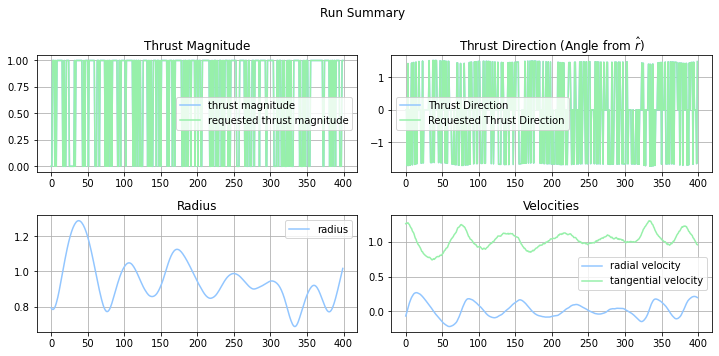

iters: 400, tot_rwd: -2.721e+01
Episode: 1
iters: 400, tot_rwd: -1.124e+02
Episode: 2
iters: 400, tot_rwd: -1.202e+02
Episode: 3
iters: 400, tot_rwd: -1.111e+02
Episode: 4
iters: 400, tot_rwd: -1.478e+02
Episode: 5
iters: 400, tot_rwd: -1.412e+02
Episode: 6
iters: 400, tot_rwd: -1.145e+02
Episode: 7
iters: 400, tot_rwd: -6.627e+01
Episode: 8
iters: 400, tot_rwd: -1.905e+02
Episode: 9
iters: 400, tot_rwd: -3.421e+01
Episode: 10
iters: 400, tot_rwd: -1.005e+02
Episode: 11
iters: 400, tot_rwd: -9.872e+01
Episode: 12
iters: 400, tot_rwd: -3.095e+01
Episode: 13
iters: 400, tot_rwd: -7.659e+01
Episode: 14
iters: 400, tot_rwd: -7.872e+01
Episode: 15
iters: 400, tot_rwd: -8.560e+01
Episode: 16
iters: 400, tot_rwd: -1.132e+02
Episode: 17
iters: 400, tot_rwd: -1.022e+02
Episode: 18
iters: 400, tot_rwd: -2.562e+02
Episode: 19
iters: 400, tot_rwd: -8.141e+01
Episode: 20
iters: 400, tot_rwd: -1.323e+02
Episode: 21
iters: 400, tot_rwd: -6.884e+01
Episode: 22
iters: 400, tot_rwd: -6.026e+01
Episode: 

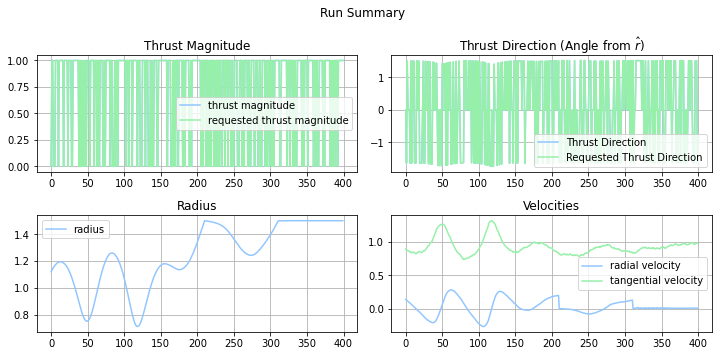

iters: 400, tot_rwd: -1.412e+02
Episode: 101
iters: 400, tot_rwd: -2.508e+02
Episode: 102
iters: 400, tot_rwd: -2.450e+02
Episode: 103
iters: 400, tot_rwd: -1.820e+02
Episode: 104
iters: 400, tot_rwd: -2.514e+02
Episode: 105
iters: 400, tot_rwd: -2.517e+02
Episode: 106
iters: 400, tot_rwd: -2.630e+02
Episode: 107
iters: 400, tot_rwd: -2.594e+02
Episode: 108
iters: 400, tot_rwd: -2.370e+02
Episode: 109
iters: 400, tot_rwd: -2.532e+02
Episode: 110
iters: 400, tot_rwd: -2.562e+02
Episode: 111
iters: 400, tot_rwd: -1.833e+02
Episode: 112
iters: 400, tot_rwd: -2.090e+02
Episode: 113
iters: 400, tot_rwd: -2.319e+02
Episode: 114
iters: 400, tot_rwd: -2.753e+02
Episode: 115
iters: 400, tot_rwd: -2.146e+02
Episode: 116
iters: 400, tot_rwd: -2.672e+02
Episode: 117
iters: 400, tot_rwd: -2.510e+02
Episode: 118
iters: 400, tot_rwd: -2.276e+02
Episode: 119
iters: 400, tot_rwd: -2.585e+02
Episode: 120
iters: 400, tot_rwd: -2.466e+02
Episode: 121
iters: 400, tot_rwd: -2.252e+02
Episode: 122
iters: 400

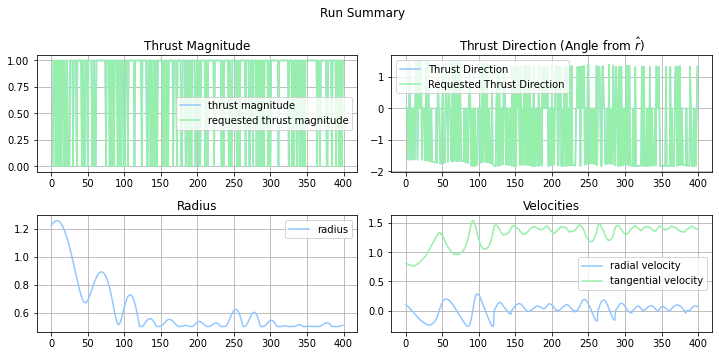

iters: 400, tot_rwd: -2.366e+02, lss: 8.970e-02
Episode: 201
iters: 400, tot_rwd: -8.439e+01
Episode: 202
iters: 400, tot_rwd: -1.151e+02
Episode: 203
iters: 400, tot_rwd: -4.619e+01
Episode: 204
iters: 400, tot_rwd: -8.333e+01
Episode: 205
iters: 400, tot_rwd: -3.945e+01
Episode: 206
iters: 400, tot_rwd: -8.170e+01
Episode: 207
iters: 400, tot_rwd: -6.054e+01
Episode: 208
iters: 400, tot_rwd: -9.835e+01, lss: 2.683e-01
Episode: 209
iters: 400, tot_rwd: -1.550e+02
Episode: 210
iters: 400, tot_rwd: -2.055e+02
Episode: 211
iters: 400, tot_rwd: -1.688e+02
Episode: 212
iters: 400, tot_rwd: -2.018e+02
Episode: 213
iters: 400, tot_rwd: -2.048e+02
Episode: 214
iters: 400, tot_rwd: -1.327e+02
Episode: 215
iters: 400, tot_rwd: -1.961e+02
Episode: 216
iters: 400, tot_rwd: -2.180e+02, lss: 5.842e-02
Episode: 217
iters: 400, tot_rwd: -2.581e+02
Episode: 218
iters: 400, tot_rwd: -1.696e+02
Episode: 219
iters: 400, tot_rwd: -2.429e+02
Episode: 220
iters: 400, tot_rwd: -2.437e+02
Episode: 221
iters: 

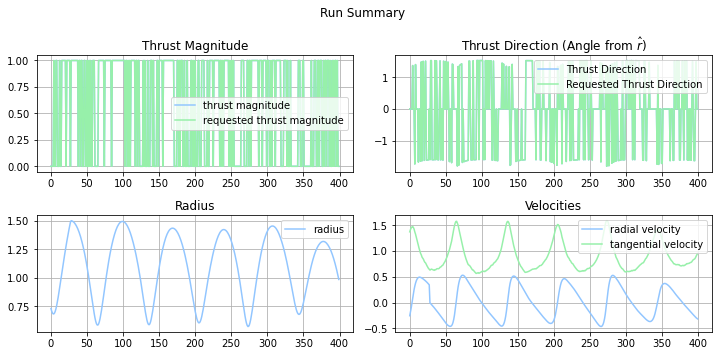

iters: 400, tot_rwd: -1.309e+02
Episode: 301
iters: 400, tot_rwd: -7.760e+01
Episode: 302
iters: 400, tot_rwd: -9.939e+01
Episode: 303
iters: 400, tot_rwd: -8.415e+01
Episode: 304
iters: 400, tot_rwd: -1.014e+02, lss: 8.171e-02
Episode: 305
iters: 400, tot_rwd: -2.840e+02
Episode: 306
iters: 400, tot_rwd: -2.986e+02
Episode: 307
iters: 400, tot_rwd: -3.023e+02
Episode: 308
iters: 400, tot_rwd: -2.745e+02
Episode: 309
iters: 400, tot_rwd: -2.680e+02
Episode: 310
iters: 400, tot_rwd: -2.936e+02
Episode: 311
iters: 400, tot_rwd: -2.834e+02
Episode: 312
iters: 400, tot_rwd: -2.802e+02, lss: 9.191e-02
Episode: 313
iters: 400, tot_rwd: -2.108e+02
Episode: 314
iters: 400, tot_rwd: -2.418e+02
Episode: 315
iters: 400, tot_rwd: -2.286e+02
Episode: 316
iters: 400, tot_rwd: -2.379e+02
Episode: 317
iters: 400, tot_rwd: -2.338e+02
Episode: 318
iters: 400, tot_rwd: -2.642e+02
Episode: 319
iters: 400, tot_rwd: -2.539e+02
Episode: 320
iters: 400, tot_rwd: -2.387e+02, lss: 4.821e-02
Episode: 321
iters: 

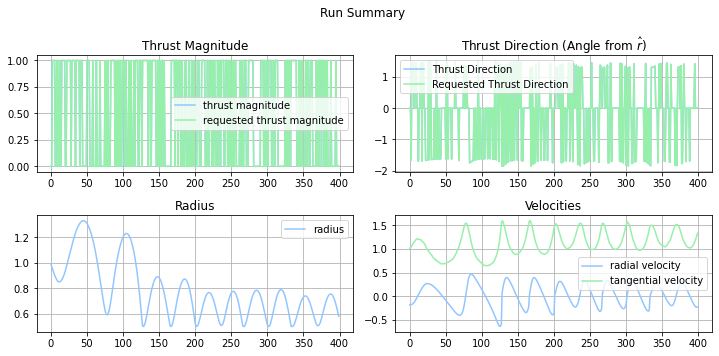

iters: 400, tot_rwd: -1.332e+02, lss: 3.113e-02
Episode: 401
iters: 400, tot_rwd: -1.312e+02
Episode: 402
iters: 400, tot_rwd: -5.336e+01
Episode: 403
iters: 400, tot_rwd: -3.559e+01
Episode: 404
iters: 400, tot_rwd: -1.062e+02
Episode: 405
iters: 400, tot_rwd: -1.546e+02
Episode: 406
iters: 400, tot_rwd: -1.691e+02
Episode: 407
iters: 400, tot_rwd: -1.372e+02
Episode: 408
iters: 400, tot_rwd: -1.562e+02, lss: 5.338e-02
Episode: 409
iters: 400, tot_rwd: -1.097e+02
Episode: 410
iters: 400, tot_rwd: -1.281e+02
Episode: 411
iters: 400, tot_rwd: -1.060e+02
Episode: 412
iters: 400, tot_rwd: -9.569e+01
Episode: 413
iters: 400, tot_rwd: -1.268e+02
Episode: 414
iters: 400, tot_rwd: -8.798e+01
Episode: 415
iters: 400, tot_rwd: -1.238e+02
Episode: 416
iters: 400, tot_rwd: -1.340e+02, lss: 8.317e-02
Episode: 417
iters: 400, tot_rwd: -1.313e+02
Episode: 418
iters: 400, tot_rwd: -1.474e+02
Episode: 419
iters: 400, tot_rwd: -1.167e+02
Episode: 420
iters: 400, tot_rwd: -9.064e+01
Episode: 421
iters: 

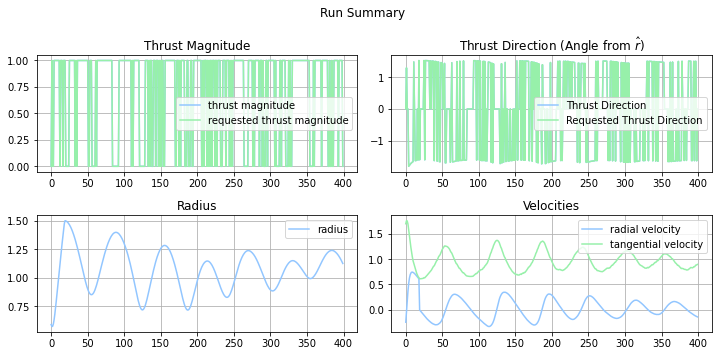

iters: 400, tot_rwd: -6.052e+01
Episode: 501
iters: 400, tot_rwd: -1.011e+02
Episode: 502
iters: 400, tot_rwd: -1.318e+02
Episode: 503
iters: 400, tot_rwd: -1.158e+02
Episode: 504
iters: 400, tot_rwd: -1.373e+02, lss: 1.046e-01
Episode: 505
iters: 400, tot_rwd: -1.076e+02
Episode: 506
iters: 400, tot_rwd: -1.275e+02
Episode: 507
iters: 400, tot_rwd: -1.286e+02
Episode: 508
iters: 400, tot_rwd: -8.218e+01
Episode: 509
iters: 400, tot_rwd: -1.200e+02
Episode: 510
iters: 400, tot_rwd: -8.099e+01
Episode: 511
iters: 400, tot_rwd: -1.197e+02
Episode: 512
iters: 400, tot_rwd: -1.445e+02, lss: 1.733e-02
Episode: 513
iters: 400, tot_rwd: -1.247e+02
Episode: 514
iters: 400, tot_rwd: -1.156e+02
Episode: 515
iters: 400, tot_rwd: -1.302e+02
Episode: 516
iters: 400, tot_rwd: -1.234e+02
Episode: 517
iters: 400, tot_rwd: -1.158e+02
Episode: 518
iters: 400, tot_rwd: -7.342e+01
Episode: 519
iters: 400, tot_rwd: -9.598e+01
Episode: 520
iters: 400, tot_rwd: -1.230e+02, lss: 1.522e-02
Episode: 521
iters: 

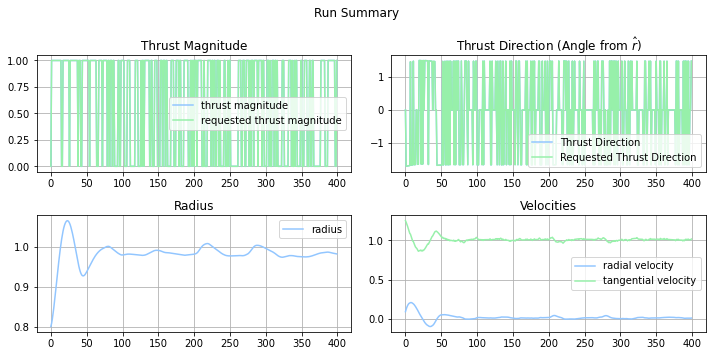

iters: 400, tot_rwd: -2.412e+00, lss: 1.489e-02
Episode: 601
iters: 400, tot_rwd: -1.371e+01
Episode: 602
iters: 400, tot_rwd: -6.837e+01
Episode: 603
iters: 400, tot_rwd: -1.044e+01
Episode: 604
iters: 400, tot_rwd: -1.077e+01
Episode: 605
iters: 400, tot_rwd: -2.431e+01
Episode: 606
iters: 400, tot_rwd: -1.095e+02
Episode: 607
iters: 400, tot_rwd: -1.037e+02
Episode: 608
iters: 400, tot_rwd: -1.713e+01, lss: 2.220e-02
Episode: 609
iters: 400, tot_rwd: -3.417e+01
Episode: 610
iters: 400, tot_rwd: -2.446e+01
Episode: 611
iters: 400, tot_rwd: -3.436e+01
Episode: 612
iters: 400, tot_rwd: -4.602e+01
Episode: 613
iters: 400, tot_rwd: -8.456e+01
Episode: 614
iters: 400, tot_rwd: -3.425e+00
Episode: 615
iters: 400, tot_rwd: -2.996e+01
Episode: 616
iters: 400, tot_rwd: -7.653e+00, lss: 7.304e-03
Episode: 617
iters: 400, tot_rwd: -1.445e+01
Episode: 618
iters: 400, tot_rwd: -3.960e+00
Episode: 619
iters: 400, tot_rwd: -3.445e+01
Episode: 620
iters: 400, tot_rwd: -4.053e+00
Episode: 621
iters: 

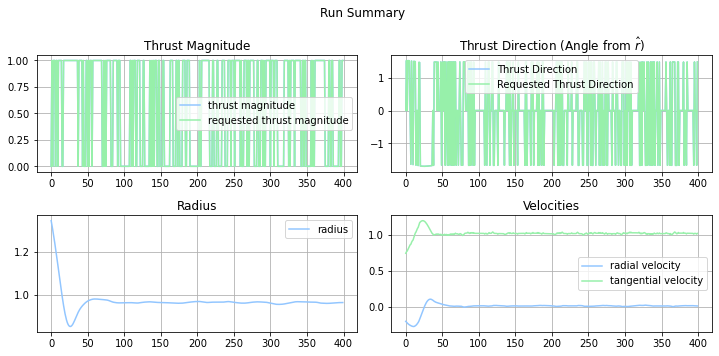

iters: 400, tot_rwd: -5.372e+00
Episode: 701
iters: 400, tot_rwd: -3.513e+00
Episode: 702
iters: 400, tot_rwd: -2.939e+00
Episode: 703
iters: 400, tot_rwd: -3.873e+00
Episode: 704
iters: 400, tot_rwd: -1.753e+01, lss: 2.970e-03
Episode: 705
iters: 400, tot_rwd: -5.483e+00
Episode: 706
iters: 400, tot_rwd: -1.665e+01
Episode: 707
iters: 400, tot_rwd: -2.186e+01
Episode: 708
iters: 400, tot_rwd: -4.973e+00
Episode: 709
iters: 400, tot_rwd: -5.199e+00
Episode: 710
iters: 400, tot_rwd: -2.308e+01
Episode: 711
iters: 400, tot_rwd: -2.118e+01
Episode: 712
iters: 400, tot_rwd: -1.415e+01, lss: 4.478e-03
Episode: 713
iters: 400, tot_rwd: -7.553e+00
Episode: 714
iters: 400, tot_rwd: -2.109e+01
Episode: 715
iters: 400, tot_rwd: -1.272e+00
Episode: 716
iters: 400, tot_rwd: -2.931e+00
Episode: 717
iters: 400, tot_rwd: -1.092e+01
Episode: 718
iters: 400, tot_rwd: -2.544e+01
Episode: 719
iters: 400, tot_rwd: -2.426e+01
Episode: 720
iters: 400, tot_rwd: -1.351e+01, lss: 3.812e-03
Episode: 721
iters: 

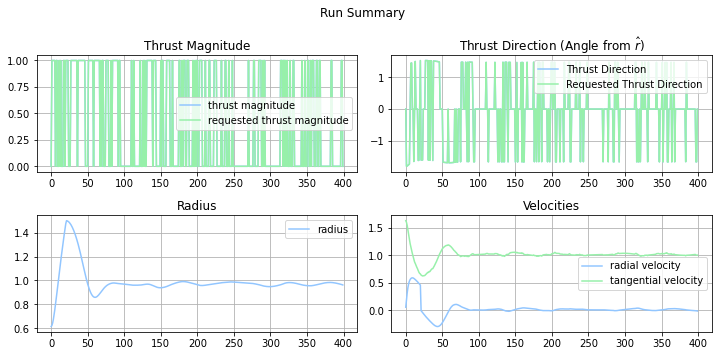

iters: 400, tot_rwd: -2.101e+01, lss: 1.114e-03
Episode: 801
iters: 400, tot_rwd: -1.778e+01
Episode: 802
iters: 400, tot_rwd: -1.907e+01
Episode: 803
iters: 400, tot_rwd: -1.514e+01
Episode: 804
iters: 400, tot_rwd: -2.315e+01
Episode: 805
iters: 400, tot_rwd: -1.671e+00
Episode: 806
iters: 400, tot_rwd: -8.567e+00
Episode: 807
iters: 400, tot_rwd: -6.406e-01
Episode: 808
iters: 400, tot_rwd: -2.356e+00, lss: 7.956e-04
Episode: 809
iters: 400, tot_rwd: -1.736e+00
Episode: 810
iters: 400, tot_rwd: -2.251e+01
Episode: 811
iters: 400, tot_rwd: -2.778e+01
Episode: 812
iters: 400, tot_rwd: -3.941e+00
Episode: 813
iters: 400, tot_rwd: -4.714e+00
Episode: 814
iters: 400, tot_rwd: -2.418e+01
Episode: 815
iters: 400, tot_rwd: -1.979e+01
Episode: 816
iters: 400, tot_rwd: -3.327e+00, lss: 2.418e-03
Episode: 817
iters: 400, tot_rwd: -4.153e+00
Episode: 818
iters: 400, tot_rwd: -2.214e+01
Episode: 819
iters: 400, tot_rwd: -8.665e+00
Episode: 820
iters: 400, tot_rwd: -2.280e+00
Episode: 821
iters: 

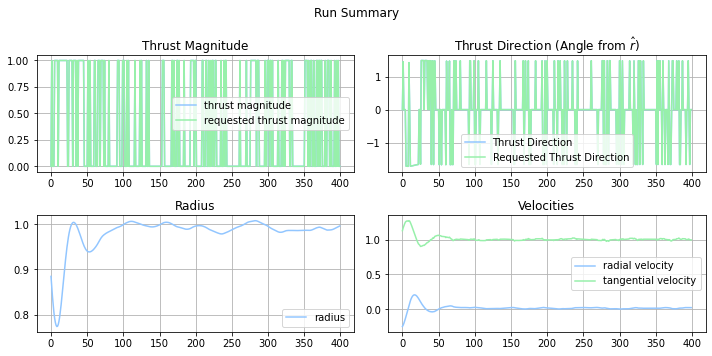

iters: 400, tot_rwd: -3.320e+00
Episode: 901
iters: 400, tot_rwd: -1.168e+00
Episode: 902
iters: 400, tot_rwd: -2.443e+01
Episode: 903
iters: 400, tot_rwd: -8.703e-01
Episode: 904
iters: 400, tot_rwd: -3.472e+00, lss: 2.197e-03
Episode: 905
iters: 400, tot_rwd: -2.573e+01
Episode: 906
iters: 400, tot_rwd: -2.285e+01
Episode: 907
iters: 400, tot_rwd: -1.281e+01
Episode: 908
iters: 400, tot_rwd: -2.508e+01
Episode: 909
iters: 400, tot_rwd: -1.131e+00
Episode: 910
iters: 400, tot_rwd: -2.348e+00
Episode: 911
iters: 400, tot_rwd: -2.860e+00
Episode: 912
iters: 400, tot_rwd: -2.363e+01, lss: 6.286e-04
Episode: 913
iters: 400, tot_rwd: -1.090e+01
Episode: 914
iters: 400, tot_rwd: -1.220e+01
Episode: 915
iters: 400, tot_rwd: -2.368e+01
Episode: 916
iters: 400, tot_rwd: -1.593e+01
Episode: 917
iters: 400, tot_rwd: -8.445e-01
Episode: 918
iters: 400, tot_rwd: -1.304e+00
Episode: 919
iters: 400, tot_rwd: -1.953e+01
Episode: 920
iters: 400, tot_rwd: -3.519e+00, lss: 1.522e-03
Episode: 921
iters: 

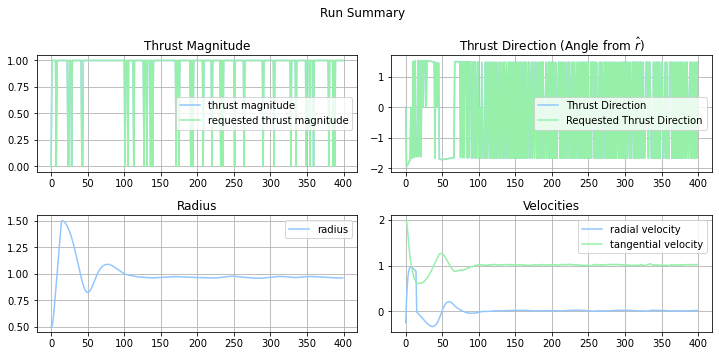

iters: 400, tot_rwd: -2.351e+01, lss: 2.330e-04
Episode: 1001
iters: 400, tot_rwd: -1.407e+01
Episode: 1002
iters: 400, tot_rwd: -1.741e+01
Episode: 1003
iters: 400, tot_rwd: -2.188e+00
Episode: 1004
iters: 400, tot_rwd: -1.489e+00
Episode: 1005
iters: 400, tot_rwd: -1.175e+01
Episode: 1006
iters: 400, tot_rwd: -4.896e+00
Episode: 1007
iters: 400, tot_rwd: -1.107e+00
Episode: 1008
iters: 400, tot_rwd: -1.905e+01, lss: 1.897e-03
Episode: 1009
iters: 400, tot_rwd: -1.824e+01
Episode: 1010
iters: 400, tot_rwd: -2.103e+01
Episode: 1011
iters: 400, tot_rwd: -1.510e+01
Episode: 1012
iters: 400, tot_rwd: -4.377e+00
Episode: 1013
iters: 400, tot_rwd: -2.032e+01
Episode: 1014
iters: 400, tot_rwd: -1.176e+01
Episode: 1015
iters: 400, tot_rwd: -1.533e+01
Episode: 1016
iters: 400, tot_rwd: -1.641e+01, lss: 9.753e-05
Episode: 1017
iters: 400, tot_rwd: -2.032e+00
Episode: 1018
iters: 400, tot_rwd: -1.767e+01
Episode: 1019
iters: 400, tot_rwd: -1.942e+01
Episode: 1020
iters: 400, tot_rwd: -8.577e+00


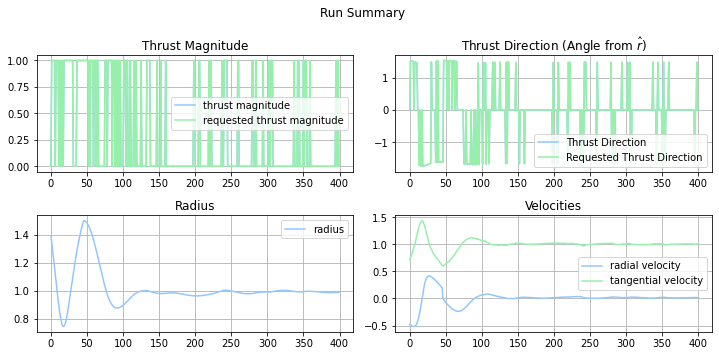

iters: 400, tot_rwd: -2.450e+01
Episode: 1101
iters: 400, tot_rwd: -1.044e+00
Episode: 1102
iters: 400, tot_rwd: -1.267e+00
Episode: 1103
iters: 400, tot_rwd: -3.435e+00
Episode: 1104
iters: 400, tot_rwd: -4.734e+00, lss: 1.987e-04
Episode: 1105
iters: 400, tot_rwd: -3.796e+00
Episode: 1106
iters: 400, tot_rwd: -1.824e+00
Episode: 1107
iters: 400, tot_rwd: -2.231e+01
Episode: 1108
iters: 400, tot_rwd: -8.405e+00
Episode: 1109
iters: 400, tot_rwd: -1.868e+01
Episode: 1110
iters: 400, tot_rwd: -1.711e+01
Episode: 1111
iters: 400, tot_rwd: -2.070e+01
Episode: 1112
iters: 400, tot_rwd: -2.115e+01, lss: 1.024e-04
Episode: 1113
iters: 400, tot_rwd: -2.830e+01
Episode: 1114
iters: 400, tot_rwd: -3.092e+00
Episode: 1115
iters: 400, tot_rwd: -4.134e+00
Episode: 1116
iters: 400, tot_rwd: -1.875e+00
Episode: 1117
iters: 400, tot_rwd: -2.189e+01
Episode: 1118
iters: 400, tot_rwd: -1.963e+01
Episode: 1119
iters: 400, tot_rwd: -2.435e+00
Episode: 1120
iters: 400, tot_rwd: -2.467e+00, lss: 3.457e-04


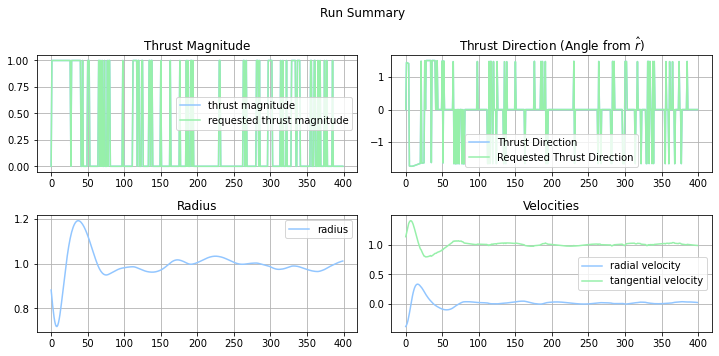

iters: 400, tot_rwd: -7.168e+00, lss: 1.593e-03
Episode: 1201
iters: 400, tot_rwd: -1.431e+01
Episode: 1202
iters: 400, tot_rwd: -9.197e+00
Episode: 1203
iters: 400, tot_rwd: -2.601e+01
Episode: 1204
iters: 400, tot_rwd: -2.107e+01
Episode: 1205
iters: 400, tot_rwd: -2.348e+00
Episode: 1206
iters: 400, tot_rwd: -4.164e+00
Episode: 1207
iters: 400, tot_rwd: -8.769e+00
Episode: 1208
iters: 400, tot_rwd: -2.361e+00, lss: 2.070e-04
Episode: 1209
iters: 400, tot_rwd: -9.241e+00
Episode: 1210
iters: 400, tot_rwd: -7.243e-01
Episode: 1211
iters: 400, tot_rwd: -2.061e+01
Episode: 1212
iters: 400, tot_rwd: -2.085e+01
Episode: 1213
iters: 400, tot_rwd: -1.403e+01
Episode: 1214
iters: 400, tot_rwd: -4.326e+00
Episode: 1215
iters: 400, tot_rwd: -2.035e+01
Episode: 1216
iters: 400, tot_rwd: -1.706e+01, lss: 1.937e-04
Episode: 1217
iters: 400, tot_rwd: -1.696e+01
Episode: 1218
iters: 400, tot_rwd: -3.693e+00
Episode: 1219
iters: 400, tot_rwd: -4.955e+00
Episode: 1220
iters: 400, tot_rwd: -1.540e+01


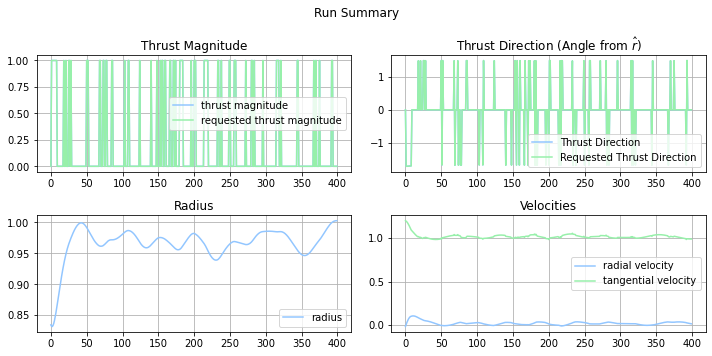

iters: 400, tot_rwd: -2.583e+00
Episode: 1301
iters: 400, tot_rwd: -4.169e+00
Episode: 1302
iters: 400, tot_rwd: -2.177e+01
Episode: 1303
iters: 400, tot_rwd: -2.467e+01
Episode: 1304
iters: 400, tot_rwd: -1.757e+01, lss: 5.031e-04
Episode: 1305
iters: 400, tot_rwd: -1.512e+00
Episode: 1306
iters: 400, tot_rwd: -1.613e+01
Episode: 1307
iters: 400, tot_rwd: -4.411e+00
Episode: 1308
iters: 400, tot_rwd: -8.838e+00
Episode: 1309
iters: 400, tot_rwd: -2.137e+01
Episode: 1310
iters: 400, tot_rwd: -5.964e+00
Episode: 1311
iters: 400, tot_rwd: -2.001e+01
Episode: 1312
iters: 400, tot_rwd: -1.379e+01, lss: 3.558e-03
Episode: 1313
iters: 400, tot_rwd: -2.371e+00
Episode: 1314
iters: 400, tot_rwd: -9.584e-01
Episode: 1315
iters: 400, tot_rwd: -1.030e+00
Episode: 1316
iters: 400, tot_rwd: -9.375e+00
Episode: 1317
iters: 400, tot_rwd: -2.069e+01
Episode: 1318
iters: 400, tot_rwd: -2.350e+00
Episode: 1319
iters: 400, tot_rwd: -1.057e+00
Episode: 1320
iters: 400, tot_rwd: -2.546e+00, lss: 7.120e-04


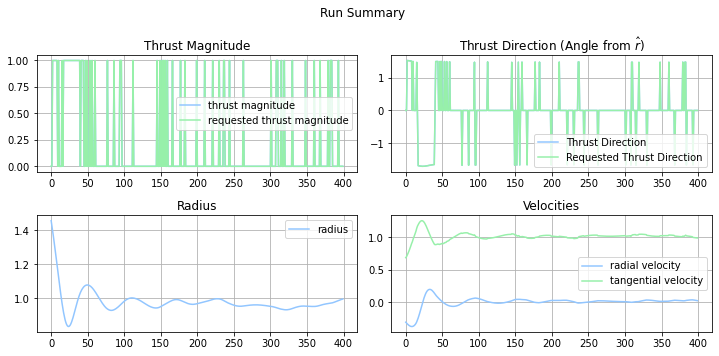

iters: 400, tot_rwd: -7.205e+00, lss: 1.025e-02
Episode: 1401
iters: 400, tot_rwd: -2.633e+00
Episode: 1402
iters: 400, tot_rwd: -2.061e+00
Episode: 1403
iters: 400, tot_rwd: -2.247e+01
Episode: 1404
iters: 400, tot_rwd: -1.458e+01
Episode: 1405
iters: 400, tot_rwd: -1.916e+01
Episode: 1406
iters: 400, tot_rwd: -6.933e+00
Episode: 1407
iters: 400, tot_rwd: -1.038e+01
Episode: 1408
iters: 400, tot_rwd: -2.624e+00, lss: 1.412e-04
Episode: 1409
iters: 400, tot_rwd: -7.745e+00
Episode: 1410
iters: 400, tot_rwd: -1.440e+01
Episode: 1411
iters: 400, tot_rwd: -1.887e+01
Episode: 1412
iters: 400, tot_rwd: -1.803e+01
Episode: 1413
iters: 400, tot_rwd: -3.775e+00
Episode: 1414
iters: 400, tot_rwd: -1.457e+01
Episode: 1415
iters: 400, tot_rwd: -4.463e+00
Episode: 1416
iters: 400, tot_rwd: -7.225e+00, lss: 1.776e-04
Episode: 1417
iters: 400, tot_rwd: -7.443e+00
Episode: 1418
iters: 400, tot_rwd: -2.912e+01
Episode: 1419
iters: 400, tot_rwd: -1.814e+01
Episode: 1420
iters: 400, tot_rwd: -9.603e+00


In [6]:
model_name = './dqn_test_10/'

model = DeepQNetwork(dims=[3, 128, 128, 3],
                        epsilon=1.0, epsilon_decay=.1, gamma=.95,
                        memory=100000, start_updating=50000,
                        batch_size=32, learning_rate=1e-4, descent_frequency=800, update_frequency=8,
                        use_target=True, target_frequency=8)
# model.load('./pdlm_ddpg_destablized/')
with rocket_gym.make('RocketCircularization-v0') as env:
    env = rocket_gym.PolarizeObservation(
        rocket_gym.TangentialThrust(
            rocket_gym.PolarizeAction(env)))
    model.train(env, episodes=1500, render_frequency=100, summary=True)
    model.save(model_name)

In [4]:
model.save(model_name)

In [5]:
!zip -r ./dqn_test_8.zip ./dqn_test_8

  adding: dqn_test_8/ (stored 0%)
  adding: dqn_test_8/experience.pk (deflated 55%)
  adding: dqn_test_8/checkpoint (deflated 34%)
  adding: dqn_test_8/.data-00000-of-00001 (deflated 8%)
  adding: dqn_test_8/.index (deflated 47%)


In [6]:
FileLink(r'./dqn_test_8.zip')

/kaggle/working/dqn_test_8.zip

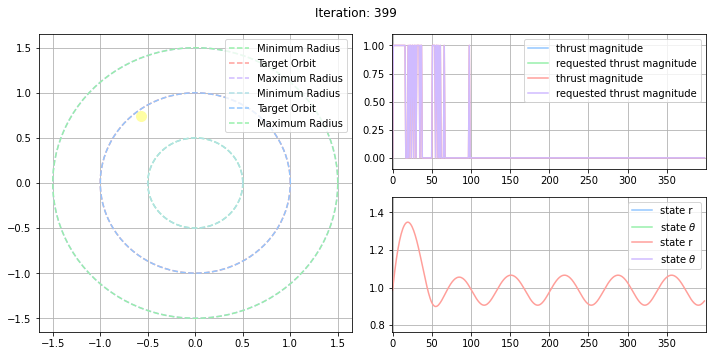

In [7]:
with rocket_gym.make('RocketCircularization-v0') as env:
    env = rocket_gym.PolarizeObservation(
        rocket_gym.TangentialThrust(
            rocket_gym.PolarizeAction(env)))
    model.load(model_name)
    model.simulate(env, render=True, evaluation=True, path='test.mp4')

In [8]:
#rs = np.linspace(0.5, 1.5, 100)
#rdts = np.linspace(-10, 10, 100)
#rm, rdtm = np.meshgrid(rs, rdts)
#inputs = np.hstack(
#    (rm.reshape(-1, 1), rdtm.reshape(-1, 1)))
#action = tf.reshape(tf.argmax(model.q_net(inputs), axis=-1), (100, 100))

#cs = plt.contourf(rm, rdtm, action - 1, label='max Q value')
#plt.colorbar(cs)
#plt.xlabel('radius')
#plt.ylabel('r dot')
#plt.legend()
#plt.show()